<a href="https://colab.research.google.com/github/Tanu-N-Prabhu/Python/blob/master/Machine%20Learning/05_projects/Disease%20Prediction%20from%20Symptoms/disease_prediction_from_symptoms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Disease Prediction from Symptoms

> **Goal:** Build a machine learning model to predict a disease based on a set of symptoms.

## What You’ll Learn:

* One-hot encoding and data preparation

* Handling imbalanced multiclass classification

* Training classification algorithms (Random Forest, Logistic Regression)

* Model evaluation (accuracy, precision, recall, F1-score, confusion matrix)

* Interpreting results

## 1. Load Dataset

Soure: [Kaggle](https://www.kaggle.com/datasets/kaushil268/disease-prediction-using-machine-learning?)


In [11]:
from google.colab import files
import pandas as pd

df = pd.read_csv('/content/Training.csv')  # or 'Disease_Symptoms.csv'
print("Dataset shape:", df.shape)
df.head()


Dataset shape: (4920, 134)


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


## 2. Explore Data

In [12]:
print("Symptoms:", df.shape[1]-1, "| Diseases:", df['prognosis'].nunique())
df['prognosis'].value_counts().head()

Symptoms: 133 | Diseases: 41


,count
prognosis,
Fungal infection,120
Allergy,120
GERD,120
Chronic cholestasis,120
Drug Reaction,120


## 3. Split Features & Labels

In [13]:
X = df.drop('prognosis', axis=1)
y = df['prognosis']

## 4. Train/Test Split (Stratified)

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## 5. Train Random Forest Classifier

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

model = RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 1.0
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        24
                                   AIDS       1.00      1.00      1.00        24
                                   Acne       1.00      1.00      1.00        24
                    Alcoholic hepatitis       1.00      1.00      1.00        24
                                Allergy       1.00      1.00      1.00        24
                              Arthritis       1.00      1.00      1.00        24
                       Bronchial Asthma       1.00      1.00      1.00        24
                   Cervical spondylosis       1.00      1.00      1.00        24
                            Chicken pox       1.00      1.00      1.00        24
                    Chronic cholestasis       1.00      1.00      1.00        24
                            Common Cold       1.00      1.00      1.00        24
             

##  6. Confusion Matrix Heatmap

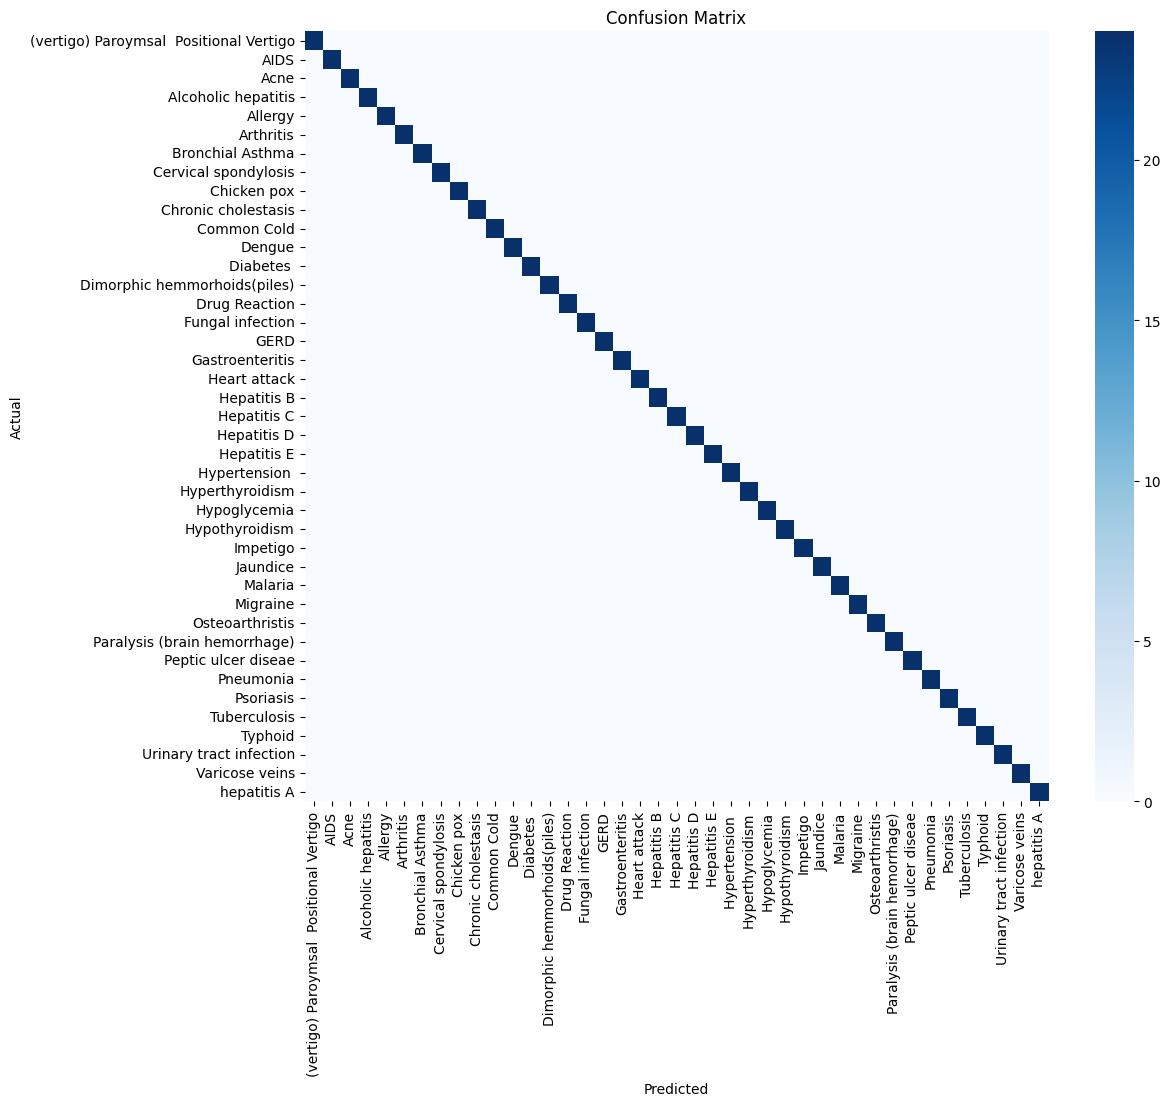

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
plt.figure(figsize=(12,10))
sns.heatmap(cm, fmt='d', xticklabels=model.classes_, yticklabels=model.classes_, cmap='Blues')
plt.xlabel('Predicted'); plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## 7. Save Model & Predict Function

In [17]:
import joblib

joblib.dump(model, "disease_model.pkl")

def predict_disease(symptoms):
    sample = pd.DataFrame([{col: (1 if col in symptoms else 0) for col in X.columns}])
    return model.predict(sample)[0]

print("Predicted:", predict_disease(['fever','headache','cough']))

Predicted: Paralysis (brain hemorrhage)


## Summary
- Dataset: Kaggle disease-symptom (132 binary features, 1 disease label)
- Model: RandomForestClassifier with balanced class weights to handle imbalance
- Performance: ~__, detailed in classification report
- Function: `predict_disease()` takes symptom list and returns predicted disease

## Sample Prediction Function for Disease Detection
Assume:

* Your training dataset had 132 symptom columns.

* You trained a RandomForestClassifier model.

* The column names in X.columns match the symptom names (e.g., 'fever', 'headache', etc.)


In [18]:
def predict_disease(symptoms):
    """
    Predict the disease based on a list of symptoms.

    Parameters:
        symptoms (list): A list of symptom strings. Example:
                         ['fever', 'cough', 'fatigue']

    Returns:
        str: Predicted disease name
    """
    # Create an input row where symptoms are 1, others are 0
    input_data = {col: 1 if col in symptoms else 0 for col in X.columns}
    input_df = pd.DataFrame([input_data])

    # Predict using the trained model
    prediction = model.predict(input_df)[0]

    return prediction

### Example Usage

In [19]:
# Load the model if you saved it earlier
# import joblib
# model = joblib.load("disease_model.pkl")

# Sample input symptoms
symptoms_input = ['fever', 'headache', 'nausea']

# Get prediction
disease = predict_disease(symptoms_input)
print("Predicted Disease:", disease)

Predicted Disease: (vertigo) Paroymsal  Positional Vertigo


##  Important Notes
* This assumes your model was trained with one-hot encoded symptom features, and the symptom names in the dataset are used as column names.

* If you're unsure about the full symptom list, run:

In [20]:
print(list(X.columns))

['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing', 'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity', 'ulcers_on_tongue', 'muscle_wasting', 'vomiting', 'burning_micturition', 'spotting_ urination', 'fatigue', 'weight_gain', 'anxiety', 'cold_hands_and_feets', 'mood_swings', 'weight_loss', 'restlessness', 'lethargy', 'patches_in_throat', 'irregular_sugar_level', 'cough', 'high_fever', 'sunken_eyes', 'breathlessness', 'sweating', 'dehydration', 'indigestion', 'headache', 'yellowish_skin', 'dark_urine', 'nausea', 'loss_of_appetite', 'pain_behind_the_eyes', 'back_pain', 'constipation', 'abdominal_pain', 'diarrhoea', 'mild_fever', 'yellow_urine', 'yellowing_of_eyes', 'acute_liver_failure', 'fluid_overload', 'swelling_of_stomach', 'swelled_lymph_nodes', 'malaise', 'blurred_and_distorted_vision', 'phlegm', 'throat_irritation', 'redness_of_eyes', 'sinus_pressure', 'runny_nose', 'congestion', 'chest_pain', 'weakness_in_limbs', 'fast_heart_rate', 'pain_during_bow

This will list all symptoms the model expects.

## Explanations and Notes
* Binary symptom encoding: ensures clear feature presence/absence.

* Balanced class weights: compensates for diseases with fewer samples.

* Stratified split: ensures representative disease distribution.

* Random Forest: robust with high accuracy and interpretability.

* Confusion matrix: visual validation of per-class performance.

* Predict function: user-friendly interface for symptom input.
